# Exercises 

In [2]:
import pandas as pd
import numpy as np

from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV,train_test_split,cross_val_score
from mlxtend.plotting import plot_decision_regions

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings 
warnings.filterwarnings('ignore')

## 4. Generate a simulated two-class data set with 100 observations and two features in which there is a visible but non-linear separation between the two classes. Show that in this setting, a support vector machine with a polynomial kernel (with degree greater than 1) or a radial kernel will outperform a support vector classifier on the training data. Which technique performs best on the test data? Make plots and report training and test error rates in order to back up your assertions.


 



In [3]:
np.random.seed(1)
X = np.random.randn(100,2)
data = pd.DataFrame(X,columns = ['X1','X2'])
y = 1*(data['X1']**4 - data['X2'] > 1) #select classes such that there is a non linear relation
data['y'] = y


<AxesSubplot:xlabel='X1', ylabel='X2'>

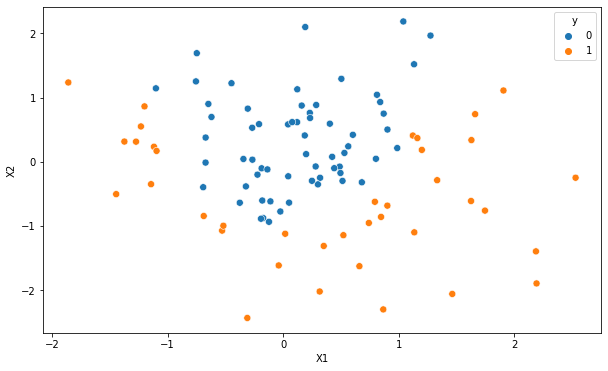

In [4]:
plt.figure(figsize = (10,6))
sns.scatterplot(x = 'X1',y = 'X2',hue = 'y',data = data,s = 50)

### Splitting the data into train and test

In [5]:
X_train,X_test,y_train,y_test = train_test_split(data.drop('y',axis=1),data['y'],test_size = 0.5,random_state = 1)
print(X_train.shape,X_test.shape)

(50, 2) (50, 2)


## Support Vector Classifier

In [6]:
svc = SVC(kernel = 'linear')
svc.fit(X_train,y_train)
print('Training score is ',svc.score(X_train,y_train))
print('Test score is ',svc.score(X_test,y_test))

Training score is  0.76
Test score is  0.78


<AxesSubplot:>

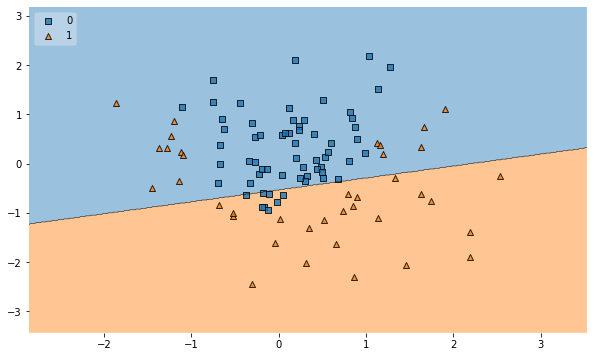

In [7]:
plt.figure(figsize = (10,6))
plot_decision_regions(np.array(data.drop('y',axis=1)), np.array(data['y']), clf=svc, legend=2)

### Use SVM with non linear kernels

In [8]:
#lets first of all choose which will be the better kernel among poly and rbf
search = GridSearchCV(SVC(),param_grid={'kernel':['poly','rbf']},cv = 5)
search.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=SVC(), param_grid={'kernel': ['poly', 'rbf']})

In [9]:
search.best_params_

{'kernel': 'rbf'}

In [10]:
best_model = search.best_estimator_
print('training score - ',best_model.score(X_train,y_train))
print('Test score - ',best_model.score(X_test,y_test))

training score -  1.0
Test score -  0.92


<AxesSubplot:>

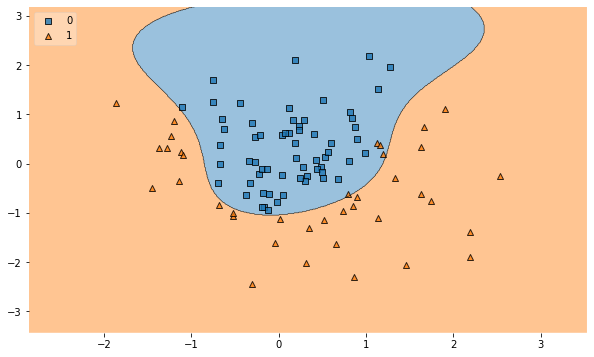

In [11]:
plt.figure(figsize = (10,6))

plot_decision_regions(np.array(data.drop('y',axis=1)), np.array(data['y']), clf=best_model, legend=2)

we are having test score of 0.92 using rbf as compared to 0.78 we had using svc

## 5. We have seen that we can fit an SVM with a non-linear kernel in order to perform classification using a non-linear decision boundary. We will now see that we can also obtain a non-linear decision boundary by performing logistic regression using non-linear transformations of the features.

 



### (a) Generate a data set with n = 500 and p = 2, such that the observations belong to two classes with a quadratic decision boundary between them. For instance, you can do this as follows:


In [12]:
np.random.seed(8)
X1 = np.random.uniform(0,1,500) - 0.5
X2 = np.random.uniform(0,1,500) - 0.5

y=1*(X1**2 - X2**2 > 0)

data = pd.DataFrame({'X1':X1,'X2':X2,'y':y})


### (b) Plot the observations, colored according to their class labels.  Your plot should display X1 on the x-axis, and X2 on the yaxis.
 

<AxesSubplot:xlabel='X1', ylabel='X2'>

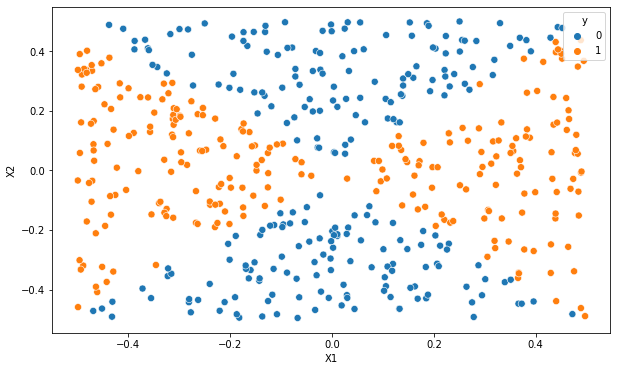

In [13]:
plt.figure(figsize = (10,6))
sns.scatterplot(x = 'X1',y = 'X2',hue = 'y',data =data,s = 50)

### (c) Fit a logistic regression model to the data, using X1 and X2 as predictors.


In [14]:
X_train,X_test,y_train,y_test = train_test_split(data.drop('y',axis=1),data['y'],test_size = 0.5,random_state = 1)

In [15]:
lr = LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression()

(-0.5, 0.5)

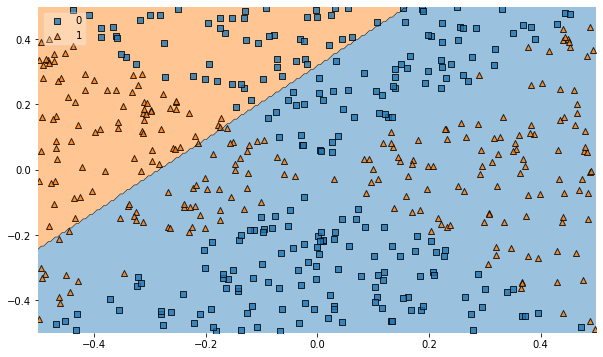

In [16]:
plt.figure(figsize = (10,6))
plot_decision_regions(np.array(data.drop('y',axis=1)), np.array(data['y']), clf=lr, legend=2)
plt.xlim(-0.5,0.5)
plt.ylim(-0.5,0.5)

In [17]:
print('Training score is ',lr.score(X_train,y_train))
print('Testing Score is ',lr.score(X_test,y_test))

Training score is  0.528
Testing Score is  0.556


### (e) Now fit a logistic regression model to the data using non-linear functions of X1 and X2 as predictors (e.g. X2 1 , X1×X2, log(X2), and so forth).




In [18]:
data['X1^2'] = data['X1']**2 
data['X2^2'] = data['X2']**2
data['X1X2'] = data['X1']*data['X2']

In [19]:
X_train,X_test,y_train,y_test = train_test_split(data.drop('y',axis=1),data['y'],test_size = 0.5,random_state = 1)

lr = LogisticRegression()
lr.fit(X_train,y_train)

print('Training score is ',lr.score(X_train,y_train))
print('Testing Score is ',lr.score(X_test,y_test))

Training score is  0.96
Testing Score is  0.944


We can see from above that when we use the additional terms, the model reaches a test accuracy of 0.944, whereas earlier it was almost random guessing

In [20]:
preds = lr.predict(data.drop('y',axis=1))
data['preds'] = preds

I couldn't figure out how to draw the dicision boundary here, but i plotted the predicted values, and we can see that these values are much much similar to the data we craeted. 

<AxesSubplot:xlabel='X1', ylabel='X2'>

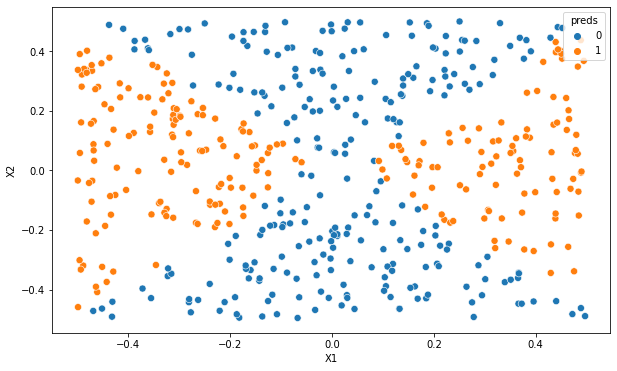

In [21]:
plt.figure(figsize = (10,6))
sns.scatterplot(x = 'X1',y = 'X2',hue = 'preds',data =data,s = 50)

### (g) Fit a support vector classifier to the data with X1 and X2 as predictors. Obtain a class prediction for each training observation. Plot the observations, colored according to the predicted class labels.



okay but before that, lets remove the additional features that were added in the last part

In [22]:
data.drop(['X1^2','X2^2','X1X2','preds'],axis = 1,inplace  = True)

In [23]:
X_train,X_test,y_train,y_test = train_test_split(data.drop('y',axis=1),data['y'],test_size = 0.5,random_state = 1)


In [24]:
svc = SVC(kernel = 'linear')
svc.fit(X_train,y_train)

SVC(kernel='linear')

In [25]:
print('Training score is ',svc.score(X_train,y_train))
print('Testing Score is ',svc.score(X_test,y_test))

Training score is  0.512
Testing Score is  0.48


<AxesSubplot:xlabel='X1', ylabel='X2'>

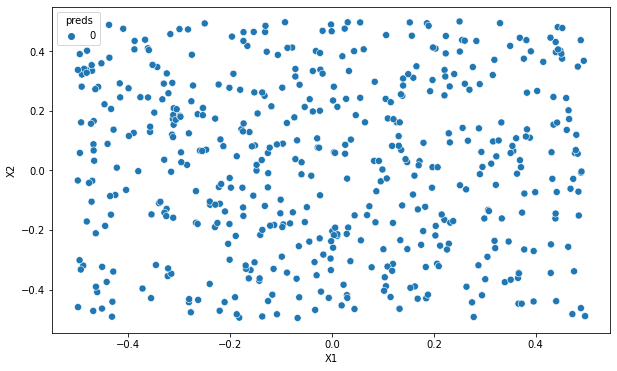

In [26]:
preds = svc.predict(data.drop('y',axis=1))
data['preds'] = preds

plt.figure(figsize = (10,6))
sns.scatterplot(x = 'X1',y = 'X2',hue = 'preds',data =data,s = 50)

Well, its predicting everything to 1 class


### (h) Fit a SVM using a non-linear kernel to the data. Obtain a class prediction for each training observation. Plot the observations, colored according to the predicted class labels.



In [27]:
data.drop('preds',axis=1,inplace = True)

In [28]:
#lets use grid search to select the optimal hyperparamters
search = GridSearchCV(SVC(kernel = 'rbf'),param_grid={'C':[0.1,1,10,100,1000]},cv = 10)
search.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=SVC(), param_grid={'C': [0.1, 1, 10, 100, 1000]})

In [29]:
search.best_params_

{'C': 100}

In [30]:
best_model = search.best_estimator_
print('Training score ',best_model.score(X_train,y_train))
print('Testing Score ',best_model.score(X_test,y_test))

Training score  1.0
Testing Score  0.976


(-0.5, 0.5)

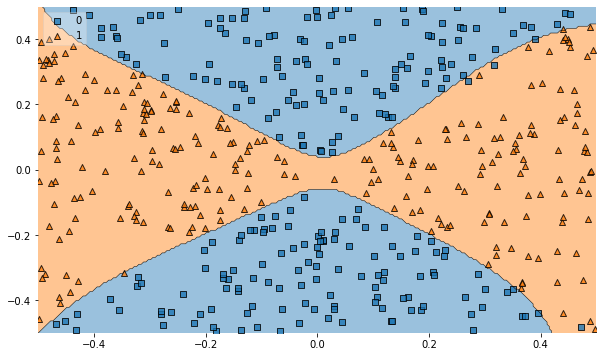

In [31]:
plt.figure(figsize = (10,6))
plot_decision_regions(np.array(data.drop('y',axis=1)), np.array(data['y']), clf=best_model, legend=2)
plt.xlim(-0.5,0.5)
plt.ylim(-0.5,0.5)

This looks classy :D

### (i) Comment on your results.

We can see that logistic regression with 2 features, and svc both performed very poorly. We got good results when we tried logiswtic regression while adding more features, but we got the best result from using svm with non linear kernel

## 6. At the end of Section 9.6.1, it is claimed that in the case of data that is just barely linearly separable, a support vector classifier with a small value of cost that misclassifies a couple of training observations may perform better on test data than one with a huge value of cost that does not misclassify any training observations. You will now investigate this claim.



 


### (a) Generate two-class data with p = 2 in such a way that the classes are just barely linearly separable.


In [32]:
#set seed 
np.random.seed(1)
X = np.random.normal(size = (200,2))
y = 1*(X[:,0] + X[:,1] > 0)

In [33]:
#making a dataframe
df = pd.DataFrame({'X1':X[:,0],'X2':X[:,1],'y':y})
df.head()

,X1,X2,y
0,1.624345,-0.611756,1
1,-0.528172,-1.072969,0
2,0.865408,-2.301539,0
3,1.744812,-0.761207,1
4,0.319039,-0.249370,1


<AxesSubplot:xlabel='X1', ylabel='X2'>

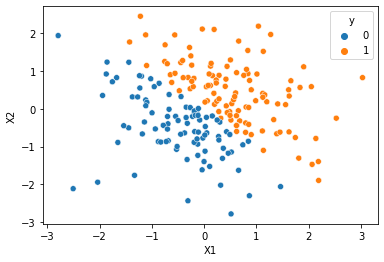

In [34]:
sns.scatterplot(x = 'X1',y = 'X2',hue = 'y',data = df)

In [35]:
#dividing it into train and test 
X_train,X_test,y_train,y_test = train_test_split(df.drop('y',axis=1),df['y'],test_size = 0.5,random_state = 1)
print(X_train.shape,X_test.shape)

(100, 2) (100, 2)


### (b) Compute the cross-validation error rates for support vector classifiers with a range of cost values. How many training errors are misclassified for each value of cost considered, and how does this relate to the cross-validation errors obtained?


In [36]:
training_scores_dict = {}
cross_val_scores_dict = {}
cost_values = np.logspace(-2,6,20)

for cost in cost_values:
  svc = SVC(kernel = 'linear',C = cost)
  svc.fit(X_train,y_train)
  training_scores_dict[cost] = svc.score(X_train,y_train)
  cross_val_scores_dict[cost] = np.mean(cross_val_score(svc,X_train,y_train,cv = 10))

Text(0, 0.5, 'Accuracy')

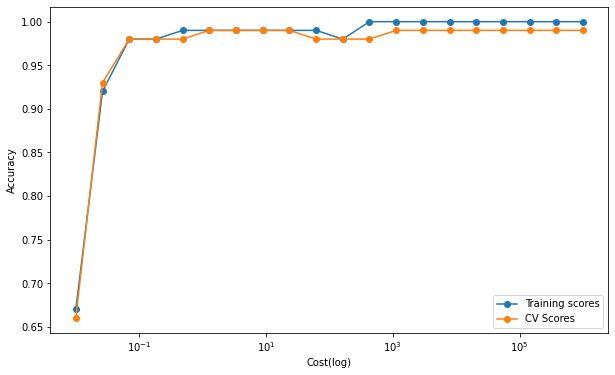

In [37]:
plt.figure(figsize = (10,6))
plt.plot(list(training_scores_dict.keys()),list(training_scores_dict.values()),marker = 'o',label = 'Training scores')
plt.plot(list(cross_val_scores_dict.keys()),list(cross_val_scores_dict.values()),marker = 'o',label = 'CV Scores')
# plt.plot(min(training_scores_dict, key=training_scores_dict.get),min(list(training_scores_dict.values())),marker = 'o',markersize = 8,c='r',label = 'min_error')
plt.legend()
plt.xscale('log')
plt.xlabel('Cost(log)')
plt.ylabel('Accuracy')

### (c) Generate an appropriate test data set, and compute the test errors corresponding to each of the values of cost considered. Which value of cost leads to the fewest test errors, and how does this compare to the values of cost that yield the fewest training errors and the fewest cross-validation errors?





In [38]:
test_scores_dict = {}
cost_values = np.logspace(-2,6,20)

for cost in cost_values:
  svc = SVC(kernel = 'linear',C = cost)
  svc.fit(X_train,y_train)
  test_scores_dict[cost] = svc.score(X_test,y_test)

Text(0, 0.5, 'Accuracy')

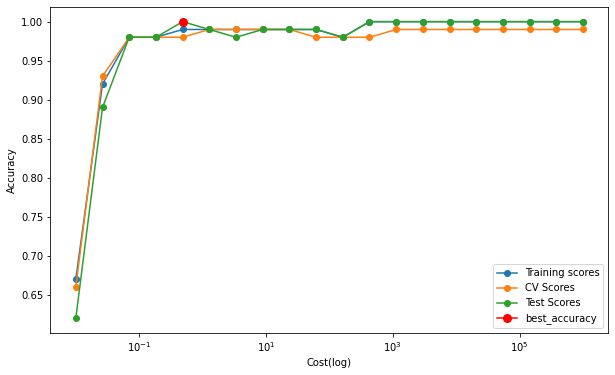

In [39]:
plt.figure(figsize = (10,6))
plt.plot(list(training_scores_dict.keys()),list(training_scores_dict.values()),marker = 'o',label = 'Training scores')
plt.plot(list(cross_val_scores_dict.keys()),list(cross_val_scores_dict.values()),marker = 'o',label = 'CV Scores')
plt.plot(list(test_scores_dict.keys()),list(test_scores_dict.values()),marker = 'o',label = 'Test Scores')

plt.plot(max(test_scores_dict, key=test_scores_dict.get),max(list(test_scores_dict.values())),marker = 'o',markersize = 8,c='r',label = 'best_accuracy')
plt.legend()
plt.xscale('log')
plt.xlabel('Cost(log)')
plt.ylabel('Accuracy')

In [40]:
print('The best test accuracy is when cost  = ',max(test_scores_dict, key=test_scores_dict.get))

The best test accuracy is when cost  =  0.4832930238571752


### (d) Discuss your results

The training accuracy always increasess with increase in the value of C, so, we cant' use that to decide which is the best value of C for this data, so, we will analyze the test error, we can see that the test error is the highest at a point and then becomes steady, so we will use that value of C for our final model

## 7. In this problem, you will use support vector approaches in order to predict whether a given car gets high or low gas mileage based on the Auto data set.



In [41]:
data = pd.read_csv(r'./data/Auto.csv')
print(data.shape)
data.head()

(397, 9)


,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


If you have done the previous notebooks too, you must know there's something wrong with this data....remember...
think.....
HORSEPOWER...has some '?'. 
SO, lets remove if first 

In [42]:
data['horsepower'] = data['horsepower'].replace('?',np.nan)
data.dropna(inplace = True)
data['horsepower'] = data['horsepower'].astype('int')

### (a) Create a binary variable that takes on a 1 for cars with gas mileage above the median, and a 0 for cars with gas mileage below the median.



In [43]:
data['mpg_binary'] = np.where(data['mpg'] > np.median(data['mpg']),1,0)
X = data.drop(['mpg','name','mpg_binary'],axis=1)
y = data['mpg_binary']

### (b) Fit a support vector classifier to the data with various values of cost, in order to predict whether a car gets high or low gas mileage. Report the cross-validation errors associated with different values of this parameter. Comment on your results.



In [44]:
from tqdm import tqdm
svc_scores_dict = {}
cost_values = np.logspace(-2,6,10)

for cost in tqdm(cost_values):
    svc = SVC(kernel = 'linear',C = cost)
    svc.fit(X,y)
    svc_scores_dict[cost] = np.mean(cross_val_score(svc,X,y,cv=10))

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [02:20<00:00, 14.06s/it]


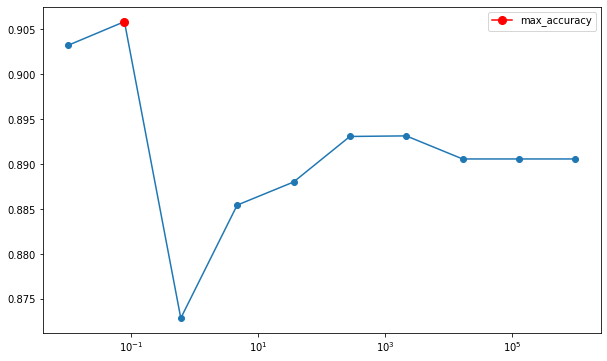

In [45]:
plt.figure(figsize = (10,6))
plt.plot(list(svc_scores_dict.keys()),list(svc_scores_dict.values()),marker = 'o')
plt.plot(max(svc_scores_dict, key=svc_scores_dict.get),max(list(svc_scores_dict.values())),marker = 'o',markersize = 8,c='r',label = 'max_accuracy')
plt.legend()
plt.xscale('log')

### (c) Now repeat (b), this time using SVMs with radial and polynomial basis kernels, with different values of gamma and degree and cost. Comment on your results.


In [46]:
from tqdm import tqdm
rbf_scores_dict = {}
poly_scores_dict = {}

cost_values = np.logspace(-2,6,20)

for cost in tqdm(cost_values):
  rbf = SVC(kernel = 'rbf',C = cost)
  rbf.fit(X,y)
  rbf_scores_dict[cost] = np.mean(cross_val_score(rbf,X,y,cv=10))

  poly = SVC(kernel = 'poly',C = cost)
  poly.fit(X,y)
  poly_scores_dict[cost] = np.mean(cross_val_score(poly,X,y,cv=10))


100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [01:35<00:00,  4.79s/it]


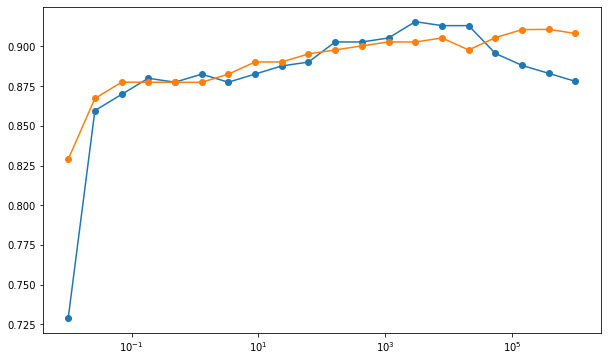

In [48]:
plt.figure(figsize = (10,6))
plt.plot(list(rbf_scores_dict.keys()),list(rbf_scores_dict.values()),marker = 'o')
plt.plot(list(poly_scores_dict.keys()),list(poly_scores_dict.values()),marker = 'o')
# plt.legend()
plt.xscale('log')

# Last question in a separate notebook.....